sat
[y_0_2 = 22,
 y_1_1 = 2,
 x_0_1 = -1,
 y_2_2 = 0,
 x_2_2 = -3,
 x_0_2 = -2,
 x_1_1 = 19,
 y_0_1 = 4,
 y_1_2 = 24,
 x_1_2 = 16,
 y_2_1 = 0,
 x_2_1 = 1,
 x_1_3 = 17,
 y_1_0 = 1,
 y_2_0 = 0,
 x_2_0 = 0,
 x_1_0 = 9,
 x_2_3 = 20,
 y_1_3 = 13,
 y_0_0 = 5,
 x_0_0 = 3,
 y_2_3 = 20,
 y_0_3 = 23,
 x_0_3 = 15]


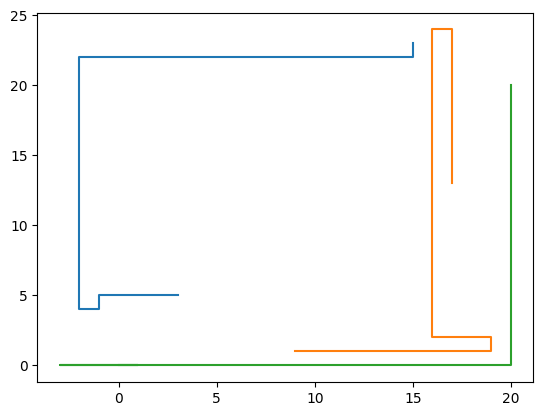

In [19]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

def collision_model(sig1, sig2):
    l = []
    for i1, s1 in enumerate(sig1):
        for i2, s2 in enumerate(sig2):
            if i1 % 2 == 0:
                if i2 % 2 == 1:
                    l.append(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))
            if i1 % 2 == 1:
                if i2 % 2 == 0:
                    l.append(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
    return l


def declare_all_signals(nbr_sigs, nbr_segms):
    return [[[z3.Int(f"x_{k}_{i}"), z3.Int(f"y_{k}_{i}")] for i in range(nbr_segms)] for k in range(nbr_sigs)]

def make_all_signals(s):
    return [make_sig([x[0] for x in e], [y[1] for y in e], int(len(e)/2+2)) for e in s]

#def make_all_collisions(sigs):
    

s = z3.Solver()



pts = declare_all_signals(3, 8)



sig1, sig2, sig3 = make_all_signals(pts)


s.add(collision_model(sig1, sig2))
s.add(collision_model(sig2, sig3))
s.add(collision_model(sig1, sig3))

        



s.add(pts[0][0][0] == 3)
s.add(pts[0][0][1] == 5)
s.add(pts[0][3][0] == 15)
s.add(pts[0][3][1] == 23)

s.add(pts[1][0][0] == 9)
s.add(pts[1][0][1] == 1)
s.add(pts[1][3][0] == 17)
s.add(pts[1][3][1] == 13)

s.add(pts[2][0][0] == 0)
s.add(pts[2][0][1] == 0)
s.add(pts[2][3][0] == 20)
s.add(pts[2][3][1] == 20)


print(s.check())
m = s.model()
print(m)



xav = [m[e[0]].as_long() for e in pts[0] if m[e[0]] is not None]
yav = [m[e[1]].as_long() for e in pts[0] if m[e[1]] is not None]
xbv = [m[e[0]].as_long() for e in pts[1] if m[e[0]] is not None]
ybv = [m[e[1]].as_long() for e in pts[1] if m[e[1]] is not None]
xcv = [m[e[0]].as_long() for e in pts[2] if m[e[0]] is not None]
ycv = [m[e[1]].as_long() for e in pts[2] if m[e[1]] is not None]




ptsa = [(xav[int(i/2+0.5)], yav[int(i/2)]) for i in range(len(xav)+len(yav)-1)]
ptsb = [(xbv[int(i/2+0.5)], ybv[int(i/2)]) for i in range(len(xbv)+len(ybv)-1)]
ptsc = [(xcv[int(i/2+0.5)], ycv[int(i/2)]) for i in range(len(xcv)+len(ycv)-1)]

plt.plot(*zip(*ptsa))
plt.plot(*zip(*ptsb))
plt.plot(*zip(*ptsc))
plt.show()



In [243]:
m[m[0]].as_long()

24

In [12]:
def colision(xa1, xa2, ya, xb, yb1, yb2):
    return xb < min(xa1,xa2) or xb > max(xa1,xa2) or ya < min(yb1,yb2) or ya > max(yb1,yb2)

In [14]:
colision(3, 8, 5, 3, 1, 9)

False

In [9]:
l1 = [5, 4, 2, -3,1]
x = 0
y = 0
pts = []
for i, e in enumerate(l1):
    print(f"{i}:{e}")
    if i % 2 == 0:
        x += e
    else:
        y += e
    pts.append((x,y))
print(pts)

0:5
1:4
2:2
3:-3
4:1
[(5, 0), (5, 4), (7, 4), (7, 1), (8, 1)]


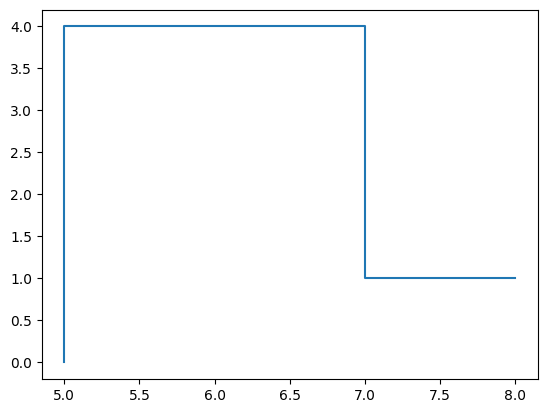

In [10]:
from matplotlib import pyplot as plt
plt.plot(*zip(*pts))

In [116]:
[3,i for i in range(7)]

SyntaxError: did you forget parentheses around the comprehension target? (3726534326.py, line 1)

In [267]:
print(*zip(*ptsa))

(3, 15, 15, 16, 16, 15, 15) (5, 5, -2, -2, 16, 16, 23)


In [281]:
{e: m[e] for e in m}

{ya1: 24,
 xb2: -3,
 yc2: -2,
 yb1: 4,
 xa2: 16,
 yb2: 3,
 yc1: 2,
 ya2: 24,
 xc1: -1,
 xb1: 17,
 xa1: 15,
 xc2: -2,
 yb0: 1,
 ya0: 5,
 xb0: 9,
 xc0: 0,
 xb3: 17,
 xa3: 15,
 yc0: 0,
 xa0: 3,
 yc3: 20,
 xc3: 20,
 yb3: 13,
 ya3: 23}

In [2]:
e = [[1,2],[3,4]]

In [7]:
[s[0] for s in e]

[1, 3]